In [2]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt 


In [109]:
import numpy as np


class Perceptron(object):

  
    def __init__(self, training_speed=0.01, gen=50, random_state=1):
        """
            training_speed - скорость тренироки
            random_state - свободный вес для начального распределения весов
            gen - количество поколений для тренировки
        """
        self.training_speed = training_speed
        self.gen = gen
        self.random_state = random_state

    def fit(self, train_x, train_y):
        """
            train_x - входные тренировочные данные
            train_y - "учитель" для сверки результата и подгона параметров
        
        """
        
        #рандомное заполнение весов 
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + train_x.shape[1])
        self.err = []

        for _ in range(self.gen):
            err_n = 0 #кол-во ошибок в данном поколении 
            for xi, target in zip(train_x, train_y):
                update = self.training_speed * (target - self.predict(xi))
                self.w[1:] += update * xi
                self.w[0] += update
                err_n += int(update != 0.0)
            self.err.append(err_n )
        return self

    #вычисляет входное значение
    def net_input(self, train_x):
        return np.dot(train_x, self.w[1:]) + self.w[0]
    #возвращает класс 1 или -1 уже для любых данных 
    def predict(self, train_x):
        return np.where(self.net_input(train_x) >= 0.0, 1, -1)

In [21]:
#dataset с цветками
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data





,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


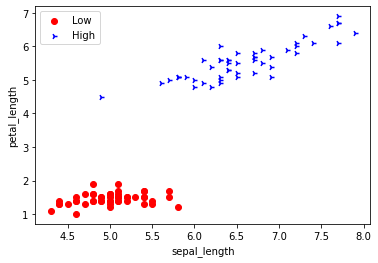

In [116]:
#Визуализация данных

x  = data.loc[(data.variety=='Setosa')]
y = data.loc[(data.variety=='Virginica')]
# x - данные для цветков типа Setosa
# y - данные для цветков типа Virginica


#создаем пары точек для построения графика 
x_d = x.loc[:,['sepal.length','petal.length']].values
y_d = y.loc[:,['sepal.length','petal.length']].values 


#строим данные 
plt.scatter(x_d[:,0], x_d[:,1],color='red',marker='o',label='Low')
plt.scatter(y_d[:,0], y_d[:,1],color='blue',marker='4',label='High')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(loc='upper left')
plt.show()




In [103]:
#разделение данных на тренировку и валидацию
train_x = data.loc[0:100,['sepal.length','petal.length']].values

train_y = data.loc[0:100,'variety'].values
train_y = np.where(train_y == 'Setosa',1,-1)
val_x = data.loc[101:150,['sepal.length','petal.length']].values
val_y = data.loc[101:150,'variety'].values
val_y = np.where(val_y == 'Setosa', 1,-1)


#train_x, train_y - данные для тренировки
#val_x val_y - данные, которые модель еще не видела, 
#на них можно проверить то, как модель обучилась

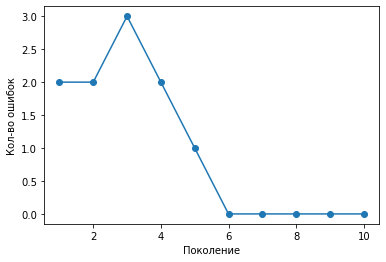

In [112]:
#обучение персцептрона
model = Perceptron(training_speed=0.1,gen=10)
model.fit(train_x,train_y)
plt.plot(range(1,len(model.err)+1),model.err,marker='o')
plt.xlabel('Поколение')
plt.ylabel ('Кол-во ошибок')
plt.show()


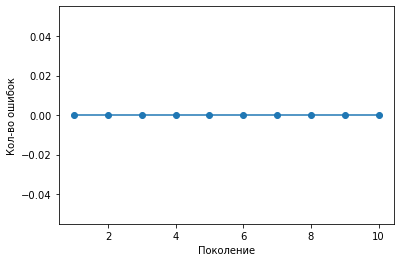

In [114]:
#проверка модели после обучения
model = Perceptron(training_speed=0.1,gen=10)
model.fit(val_x,val_y)
plt.plot(range(1,len(model.err)+1),model.err,marker='o')
plt.xlabel('Поколение')
plt.ylabel ('Кол-во ошибок')
plt.show()